In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [9]:
df_data = pd.read_csv("sat.csv")

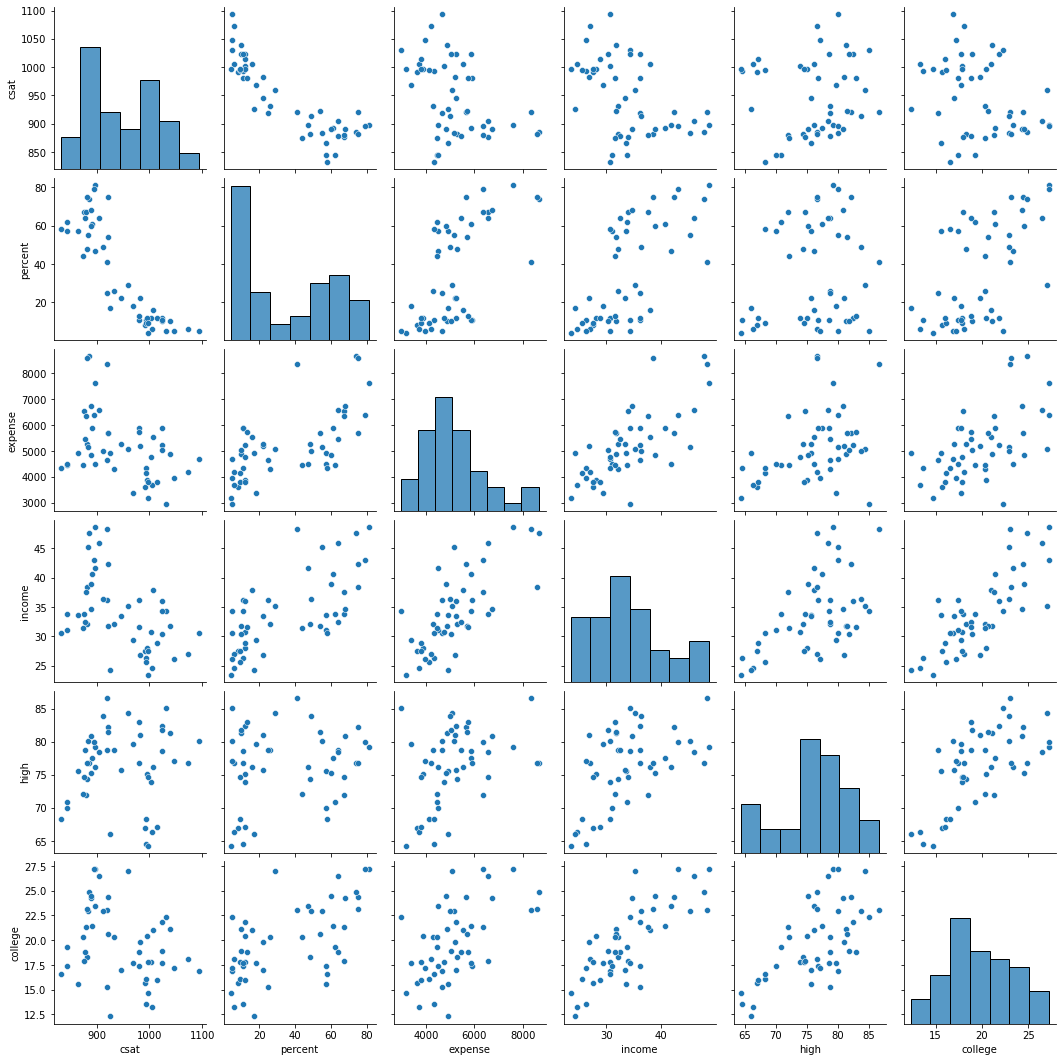

In [10]:
sns.pairplot(df_data)

In [4]:
df_data.corr(method = "pearson")

,Salary,Experience,Education,Management
Salary,1.000000,0.508189,0.221594,0.690387
Experience,0.508189,1.000000,-0.191465,-0.051441
Education,0.221594,-0.191465,1.000000,0.196684
Management,0.690387,-0.051441,0.196684,1.000000


In [11]:
df_data.columns

Index(['csat', 'percent', 'expense', 'income', 'high', 'college'], dtype='object')

In [12]:
df_data.dtypes

csat         int64
percent      int64
expense      int64
income     float64
high       float64
college    float64
dtype: object

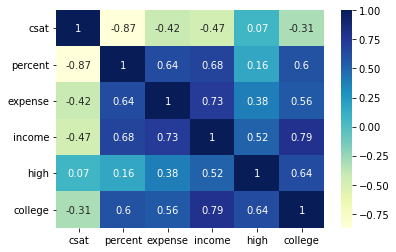

In [13]:
dataplot = sns.heatmap(df_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [14]:
model = smf.ols(formula="csat ~ percent + expense + income + high + college", data=df_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   csat   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     46.69
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.68e-16
Time:                        18:31:18   Log-Likelihood:                -233.83
No. Observations:                  50   AIC:                             479.7
Df Residuals:                      44   BIC:                             491.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    894.4627     57.783     15.480      0.0

In [15]:
results.ssr

33772.399694315536

In [16]:
anova_table = sm.stats.anova_lm(results, typ=2)
print(anova_table)

                sum_sq    df           F        PR(>F)
percent   98558.559921   1.0  128.405937  1.231290e-14
expense    2998.004334   1.0    3.905917  5.440614e-02
income     1117.445976   1.0    1.455852  2.340386e-01
high        192.878658   1.0    0.251290  6.186672e-01
college    5821.465701   1.0    7.584433  8.526901e-03
Residual  33772.399694  44.0         NaN           NaN


Text(0, 0.5, 'Residuals')

Text(0.5, 0, 'Fitted Values')

Text(0.5, 1.0, 'Residuals vs. Fitted')

Text(1015.4611307421553, 77.53886925784468, '14')

Text(857.4690642594513, 63.53093574054867, '28')

Text(1018.5460509548362, 54.45394904516377, '33')

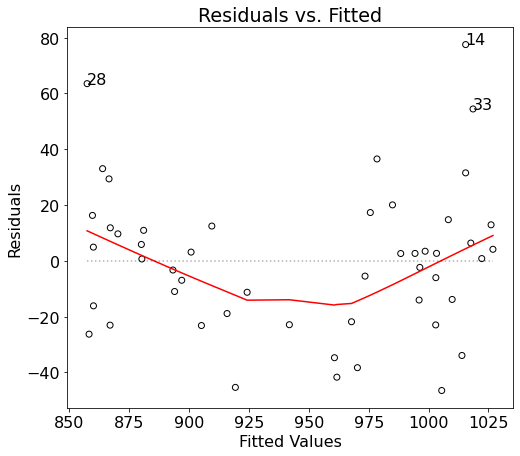

In [17]:
residuals = results.resid
fitted = results.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

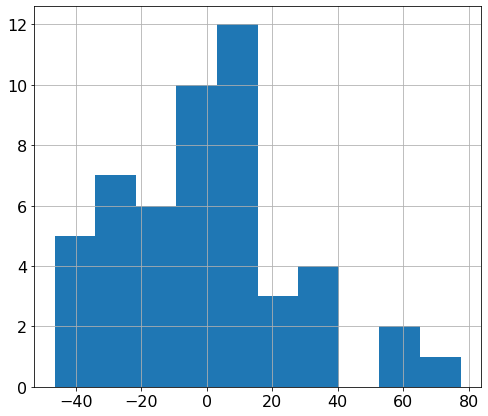

In [18]:
residuals.hist()

Text(0.5, 1.0, 'Normal Q-Q')

Text(0, 0.5, 'Standardized Residuals')

Text(0.5, 0, 'Theoretical Quantiles')

Text(2.2038543193919886, 2.9229594323969743, '14')

Text(1.8329347820969502, 2.4352725856984994, '28')

Text(1.6140232349225463, 2.029494407274759, '33')

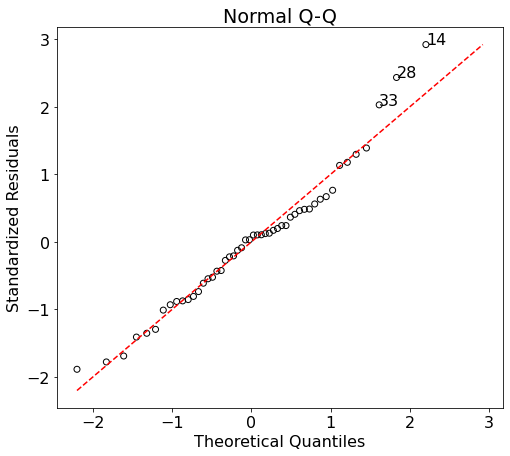

In [19]:
sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
sorted_student_residuals.index = results.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()

In [21]:
from statsmodels.graphics.regressionplots import *

   dfb_Intercept  dfb_percent  dfb_expense  dfb_income  dfb_high  dfb_college  \
0       0.026735    -0.013167    -0.004724    0.006149 -0.022618     0.005888   
1       0.541437     0.449789    -0.482025   -0.532312 -0.242491     0.412528   
2       0.068138    -0.020084     0.133706    0.041629 -0.095239    -0.054126   
3       0.180605    -0.051710     0.002694    0.012547 -0.112811    -0.033849   
4      -0.049620     0.028843     0.202606   -0.195709  0.092895    -0.042685   

    cooks_d  standard_resid  hat_diag  dffits_internal  student_resid  \
0  0.000192        0.100475  0.102543         0.033963       0.099338   
1  0.211012       -1.780578  0.285374        -1.125199      -1.827292   
2  0.014472       -1.411941  0.041738        -0.294674      -1.428541   
3  0.010955        0.764045  0.101206         0.256384       0.760374   
4  0.015587       -0.737862  0.146596        -0.305815      -0.733984   

     dffits  
0  0.033578  
1 -1.154719  
2 -0.298138  
3  0.255152  
4 -0

Text(0.5, 1.0, 'Leverage vs. Studentized Residuals')

Text(0.5, 0, 'Leverage')

Text(0, 0.5, 'Studentized Residuals')

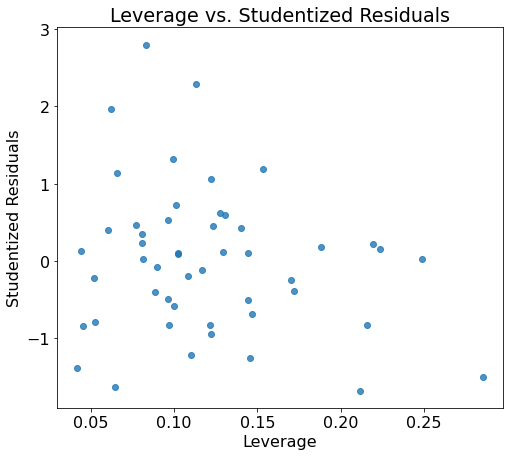

In [23]:
influence = results.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum.head())
student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, results.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [27]:
studentized_resids = student_resid
#Print the median house value of the outliers
print(df_data.csat[abs(studentized_resids) > 2])

14    1093
28     921
33    1073
Name: csat, dtype: int64


In [28]:
#Highest Negative Residuals
studentized_resid_sort = student_resid.sort_values(by = 'student_resid')
print ('*'*20 + ' Most Negative Residuals ' + '*'*20)
print (studentized_resid_sort.head())
print ('\n')
#Highest Positive Residuals
print ('*'*20 + ' Largest Positive Residuals ' + '*'*20)
print (studentized_resid_sort.tail())
print ('\n')

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'